## Visualizing IRIS netcdf tomography models


### Volume Rendering 


The volume rendering here is based on the interactive Binder notebook at the EarthCube 2020, available at the following link: https://github.com/earthcube2020/ec20_havlin_etal and requires the https://github.com/chrishavlin/yt_velmodel_vis repository. For brevity, any of the functions defined in the EarthCube notebook are moved to the `seismic_helper` module in the `resources` directory for the present notebook. See the EarthCube notebook for a detailed explanation.  

In [1]:
# imports and initialization
import os
import yt
import matplotlib.pyplot as plt
from yt_velmodel_vis import seis_model as SM, transferfunctions as TFs
from resources import seismic_helper as SH 

# load interpolated data using the yt uniform grid loader (not editable)
# set the model file and the field to visualize
modelfile='NWUS11-S_percent.nc' # the model netCDF file 
datafld='dvs' # the field to visualize, must be a variable in the netCDF file

# set the interpolation dictionary. If the interpolation for this model does 
# not exist, SM.netcdf() will build it. 
interp_dict={'field':datafld,'max_dist':50000,'res':[10000,10000,10000],
              'input_units':'m','interpChunk':int(1e7)}

# load the model 
model=SM.netcdf(modelfile,interp_dict)

# set some objects required for loading in yt 
bbox = model.cart['bbox'] # the bounding box of interpolated cartesian grid
data={datafld:model.interp['data'][datafld]} # data container for yt scene

# load the data as a uniform grid, create the 3d scene
ds = yt.load_uniform_grid(data,data[datafld].shape,1.0,bbox=bbox,nprocs=1,
                        periodicity=(True,True,True),unit_system="mks")

yt : [INFO     ] 2020-11-18 12:44:52,010 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-11-18 12:44:52,011 Parameters: domain_dimensions         = [287 271 237]
yt : [INFO     ] 2020-11-18 12:44:52,011 Parameters: domain_left_edge          = [-5201282.   -3445670.25  2740212.5 ]
yt : [INFO     ] 2020-11-18 12:44:52,012 Parameters: domain_right_edge         = [-2328344.5     -735306.5625  5113796.5   ]
yt : [INFO     ] 2020-11-18 12:44:52,012 Parameters: cosmological_simulation   = 0.0


Data loaded.


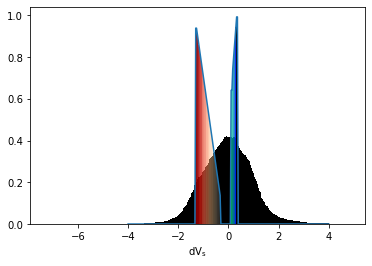

Ready to build scene


In [2]:
# setting up transfer functions 
tfOb = TFs.dv(data[datafld].ravel(),bounds=[-4,4])

# segment 1, slow anomalies
bnds=[-1.3,-.3]
TFseg=TFs.TFsegment(tfOb,bounds=bnds,cmap='OrRd_r')
alpha_o=0.95
Dalpha=-0.85
alpha=alpha_o + Dalpha/(bnds[1]-bnds[0]) * (TFseg.dvbins_c-bnds[0])
tfOb.addTFsegment(alpha,TFseg)

# segment 2, fast anomalies
bnds=[.1,.35]
TFseg=TFs.TFsegment(tfOb,bounds=bnds,cmap='winter_r')
alpha_o=.6
Dalpha=.4
alpha=alpha_o+ Dalpha/(bnds[1]-bnds[0]) * (TFseg.dvbins_c-bnds[0])
tfOb.addTFsegment(alpha,TFseg)
    
SH.plotTf(tfOb)
print("Ready to build scene")

In [6]:
sc = SH.configure_scene(ds, datafld, model, bbox, tfOb.tf,res_factor=1.25)

/home/chavlin/miniconda3/envs/yt_dev/lib/python3.7/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


Scene ready to render


yt : [INFO     ] 2020-11-18 12:45:32,123 Rendering scene (Can take a while).
yt : [INFO     ] 2020-11-18 12:45:32,268 Creating volume
/home/chavlin/miniconda3/envs/yt_dev/lib/python3.7/site-packages/unyt/array.py:1649: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


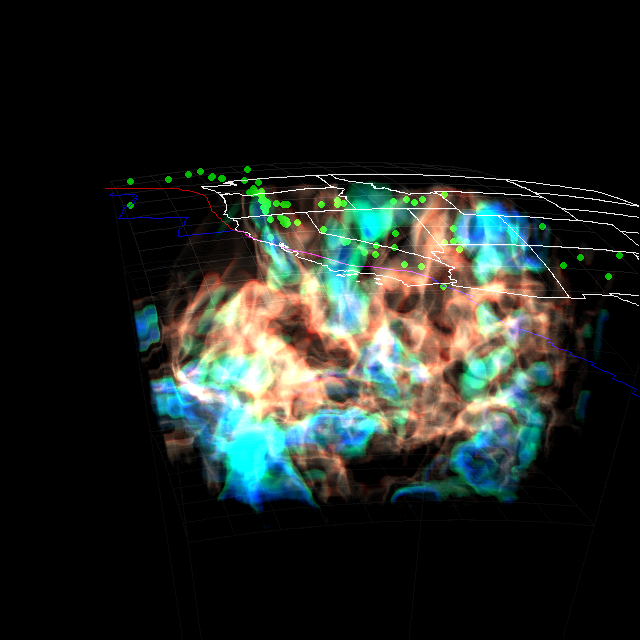

In [7]:
sc.show(sigma_clip=1.5)

### Mapping 
